# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [18]:

transactions['type'].unique()

array(['PAYMENT', 'CASH_IN', 'TRANSFER', 'CASH_OUT', 'DEBIT'],
      dtype=object)

In [27]:
type_mapping = {
    'PAYMENT': 1,
    'CASH_IN': 2,
    'TRANSFER': 3,
    'CASH_OUT': 4,
    'DEBIT': 5
}

transactions['type_mapped'] = transactions['type'].map(type_mapping)



In [42]:
transactions.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_mapped'],
      dtype='object')

In [29]:
# TODO: Begin your EDA
numeric_cols = ['type_mapped','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
transactions[numeric_cols].describe()
transactions[numeric_cols].skew()


type_mapped        0.135179
amount            33.297530
oldbalanceOrg      5.253257
newbalanceOrig     5.181797
oldbalanceDest    21.570495
newbalanceDest    20.802417
dtype: float64

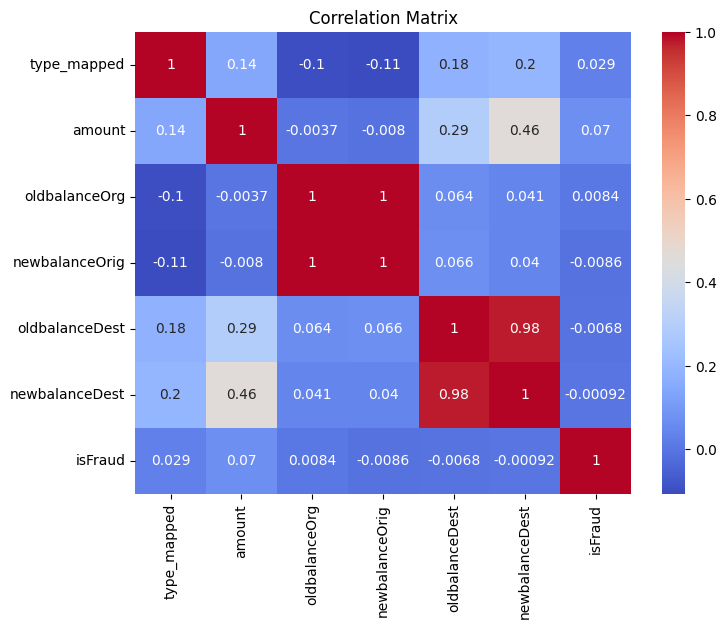

In [30]:
#correlation matrix

transform_cols=['type_mapped','type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']

plt.figure(figsize=(8, 6))
sns.heatmap(transactions[numeric_cols + ['isFraud']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


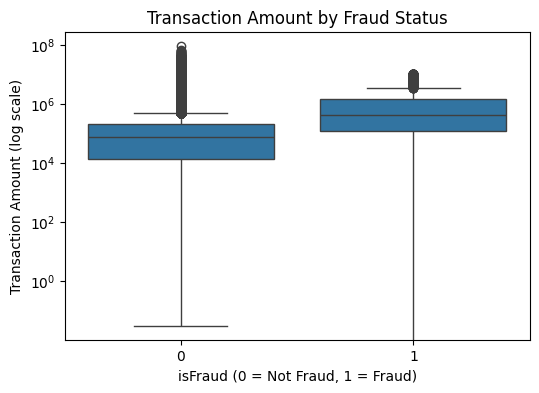

In [ ]:

plt.figure(figsize=(6, 4))
sns.boxplot(x='isFraud', y='amount', data=transactions)
plt.yscale('log')  
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('isFraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount (log scale)')
plt.show()

In [36]:
type_fraud_counts = transactions.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
type_fraud_counts.columns = ['Non-Fraud', 'Fraud']
type_fraud_counts['Total'] = type_fraud_counts['Non-Fraud'] + type_fraud_counts['Fraud']
type_fraud_counts['Fraud Rate (%)'] = (type_fraud_counts['Fraud'] / type_fraud_counts['Total']) * 100
print(type_fraud_counts.sort_values('Total', ascending=False))


          Non-Fraud  Fraud   Total  Fraud Rate (%)
type                                              
CASH_OUT     350703    657  351360        0.186988
PAYMENT      338573      0  338573        0.000000
CASH_IN      219955      0  219955        0.000000
TRANSFER      83055    640   83695        0.764681
DEBIT          6417      0    6417        0.000000


In [37]:
avg_amount_by_type_fraud = transactions.groupby(['type', 'isFraud'])['amount'].mean().unstack()
avg_amount_by_type_fraud.columns = ['Non-Fraud Avg Amount', 'Fraud Avg Amount']
avg_amount_by_type_fraud['Difference'] = avg_amount_by_type_fraud['Fraud Avg Amount'] - avg_amount_by_type_fraud['Non-Fraud Avg Amount']
avg_amount_by_type_fraud = avg_amount_by_type_fraud.sort_values('Fraud Avg Amount', ascending=False)

print(avg_amount_by_type_fraud)


          Non-Fraud Avg Amount  Fraud Avg Amount    Difference
type                                                          
TRANSFER         908187.358989      1.384176e+06  4.759887e+05
CASH_OUT         173427.674988      1.326971e+06  1.153543e+06
CASH_IN          168928.914668               NaN           NaN
DEBIT              5445.890813               NaN           NaN
PAYMENT           13055.592085               NaN           NaN


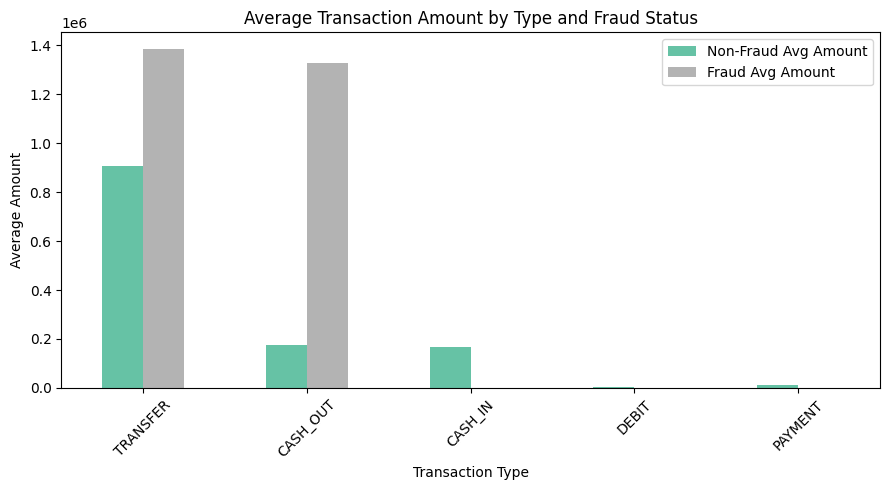

In [38]:

avg_amount_by_type_fraud[['Non-Fraud Avg Amount', 'Fraud Avg Amount']].plot(
    kind='bar', figsize=(9, 5), colormap='Set2')
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.ylabel('Average Amount')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
transactions.to_csv("../data/bank_transactions_final.csv")


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

#### Answer
Transfers have a higher rate of being marked a fraud than any other type. While not the most, it has a higher % of being fraud.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

There is a concentration of fraud in transers, in addition any amount exceeing 6 figures is more prone to fraudelent transactions.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Tranactions over 6 figures are more likely to be fraud.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

Cash outs over 200,000 and transfers over 1,000,000 are most likely to be fraud.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here

